In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
from matplotlib import style
import matplotlib.pyplot as pyplot
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv("student-mat.csv", sep = ";")

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
cols= ["G1", "G2", "G3", "studytime", "failures", "absences", "Walc", "internet"]
df = df[cols]

In [ ]:
df

,G1,G2,G3,studytime,failures,absences,Walc,internet
0,5,6,6,2,0,6,1,no
1,5,5,6,2,0,4,1,yes
2,7,8,10,2,3,10,3,yes
3,15,14,15,3,0,2,1,yes
4,6,10,10,2,0,4,2,no
...,...,...,...,...,...,...,...,...
390,9,9,9,2,2,11,5,no
391,14,16,16,1,0,3,4,yes
392,10,8,7,1,3,3,3,no
393,11,12,10,1,0,0,4,yes


In [ ]:
df["internet"] = (df["internet"] == "yes").astype(int)

<ipython-input-90-d49eb5d43541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["internet"] = (df["internet"] == "yes").astype(int)


In [ ]:
df

,G1,G2,G3,studytime,failures,absences,Walc,internet
0,5,6,6,2,0,6,1,0
1,5,5,6,2,0,4,1,1
2,7,8,10,2,3,10,3,1
3,15,14,15,3,0,2,1,1
4,6,10,10,2,0,4,2,0
...,...,...,...,...,...,...,...,...
390,9,9,9,2,2,11,5,0
391,14,16,16,1,0,3,4,1
392,10,8,7,1,3,3,3,0
393,11,12,10,1,0,0,4,1


In [ ]:
predict = "G3"
X = np.array(df.drop(columns = [predict]))
y = np.array(df[predict])

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [ ]:
list(y_test)

[6,
 16,
 12,
 10,
 12,
 11,
 13,
 11,
 0,
 13,
 0,
 11,
 12,
 9,
 20,
 18,
 14,
 11,
 15,
 10,
 7,
 13,
 4,
 11,
 11,
 7,
 12,
 12,
 8,
 8,
 10,
 13,
 16,
 10,
 11,
 18,
 13,
 10,
 11,
 10]

In [ ]:
'''best = 0
for i in range(1000):
  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)
  linear = LinearRegression()
  linear.fit(X_train, y_train)
  acc = linear.score(X_test, y_test)
  #print(acc)
  if acc > best:
    print("found one")
    print(acc)
    best = acc

    with open("studentmodel.pickle", "wb") as f:
      pickle.dump(linear, f)
best = 0'''

pickle_in = open("studentmodel.pickle", "rb")
linear1 = pickle.load(pickle_in)

In [ ]:
acc = linear1.score(X_test, y_test)
acc

0.8902769213024123

In [ ]:
linear1.coef_

array([ 0.14068447,  1.02870914, -0.21699155, -0.23094516,  0.04185194,
        0.07351434, -0.28529625])

In [ ]:
df

,G1,G2,G3,studytime,failures,absences,Walc,internet
0,5,6,6,2,0,6,1,0
1,5,5,6,2,0,4,1,1
2,7,8,10,2,3,10,3,1
3,15,14,15,3,0,2,1,1
4,6,10,10,2,0,4,2,0
...,...,...,...,...,...,...,...,...
390,9,9,9,2,2,11,5,0
391,14,16,16,1,0,3,4,1
392,10,8,7,1,3,3,3,0
393,11,12,10,1,0,0,4,1


In [ ]:
linear1.intercept_

-1.888066655503362

In [ ]:
predictions = linear1.predict(X_test)

In [ ]:
X_test

array([[ 6,  5,  2,  0,  4,  4,  1],
       [16, 15,  1,  0,  5,  2,  1],
       [14, 12,  2,  1,  8,  1,  1],
       [10, 10,  4,  0,  0,  1,  1],
       [12, 13,  2,  0,  2,  2,  1],
       [13, 11,  2,  1,  3,  2,  1],
       [11, 12,  2,  0, 10,  1,  1],
       [12, 12,  1,  0,  2,  2,  1],
       [ 6,  5,  1,  3,  0,  5,  1],
       [11, 13,  2,  0,  2,  1,  1],
       [ 6,  5,  1,  1,  0,  3,  0],
       [13, 10,  2,  1, 22,  2,  1],
       [13, 12,  3,  0,  1,  1,  0],
       [ 7,  8,  2,  3,  2,  1,  0],
       [19, 19,  4,  0,  4,  1,  1],
       [17, 18,  2,  0, 21,  3,  1],
       [13, 13,  2,  0, 14,  2,  1],
       [12, 10,  2,  0,  8,  2,  1],
       [17, 15,  1,  0,  2,  2,  0],
       [11, 10,  3,  0,  4,  2,  1],
       [ 7,  7,  2,  3,  5,  2,  1],
       [15, 13,  3,  2, 14,  1,  1],
       [ 6,  6,  2,  2, 22,  4,  1],
       [10,  9,  2,  0,  4,  2,  1],
       [11, 11,  2,  0,  4,  1,  1],
       [ 7,  7,  2,  1,  2,  1,  1],
       [14, 12,  2,  1,  0,  3,  0],
 

In [ ]:
predictions

array([ 3.84177165, 15.64752256, 11.88413098,  8.72612135, 12.68481903,
       10.57899199, 11.77672664, 11.87310143,  3.27203426, 12.47062023,
        3.87219217, 10.34546979, 11.74973278,  6.3567974 , 19.41807162,
       19.40048836, 13.32772683,  9.84980326, 15.94794745,  9.32471948,
        5.24186218, 12.85669955,  5.16192546,  8.37231741, 10.49690583,
        5.50468233, 11.98164036, 11.897032  ,  6.74653768,  7.47691344,
        8.38885117, 12.61729948, 16.45818756, 10.23033051, 11.05891689,
       19.65277504, 13.08553952,  8.59678775, 11.01398724, 10.47652673])

In [ ]:
for x in range(len(predictions)):
  print(predictions[x], X_test[x], y_test[x])

3.841771648659039 [6 5 2 0 4 4 1] 6
15.647522561152606 [16 15  1  0  5  2  1] 16
11.884130981930879 [14 12  2  1  8  1  1] 12
8.726121350495006 [10 10  4  0  0  1  1] 10
12.684819031560304 [12 13  2  0  2  2  1] 12
10.578991989277593 [13 11  2  1  3  2  1] 11
11.776726636847139 [11 12  2  0 10  1  1] 13
11.873101432583072 [12 12  1  0  2  2  1] 11
3.27203426240418 [6 5 1 3 0 5 1] 0
12.470620227221763 [11 13  2  0  2  1  1] 13
3.8721921662543464 [6 5 1 1 0 3 0] 0
10.345469785226754 [13 10  2  1 22  2  1] 11
11.749732777785452 [13 12  3  0  1  1  0] 12
6.35679740231244 [7 8 2 3 2 1 0] 9
19.41807161734098 [19 19  4  0  4  1  1] 20
19.400488359977743 [17 18  2  0 21  3  1] 18
13.327726828030798 [13 13  2  0 14  2  1] 14
9.849803264633868 [12 10  2  0  8  2  1] 11
15.947947446510408 [17 15  1  0  2  2  0] 15
9.32471947676598 [11 10  3  0  4  2  1] 10
5.241862177228526 [7 7 2 3 5 2 1] 7
12.856699547810969 [15 13  3  2 14  1  1] 13
5.1619254599260165 [ 6  6  2  2 22  4  1] 4
8.372317411853293

In [ ]:
def takeguess (a, b, c, d, e, f, g):
  if g == "yes":
    g = 1
  else:
    g = 0;
  return (linear1.predict([[a, b,  c,  d,  e,  f,  g]]))[0]

In [ ]:
takeguess(1, 15, 1, 0, 5, 4, "no")

13.969580500983069

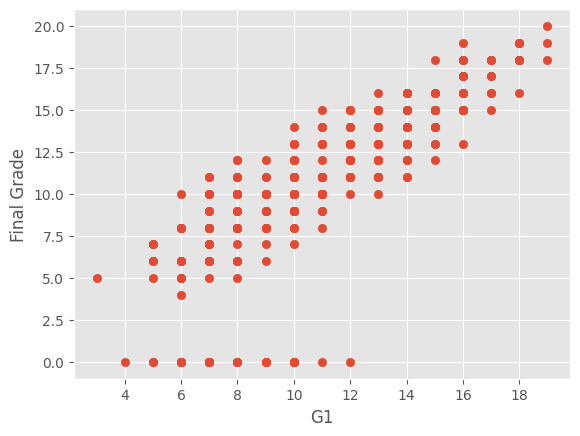

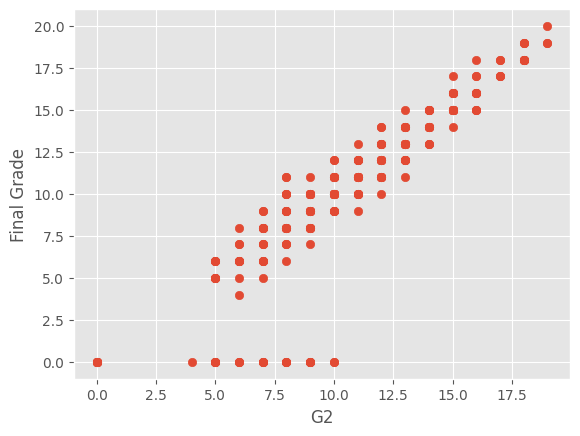

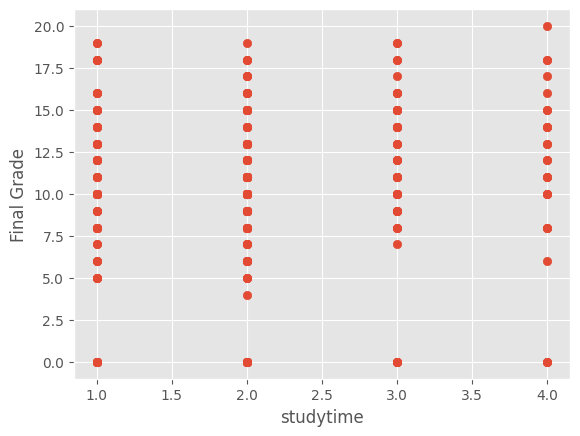

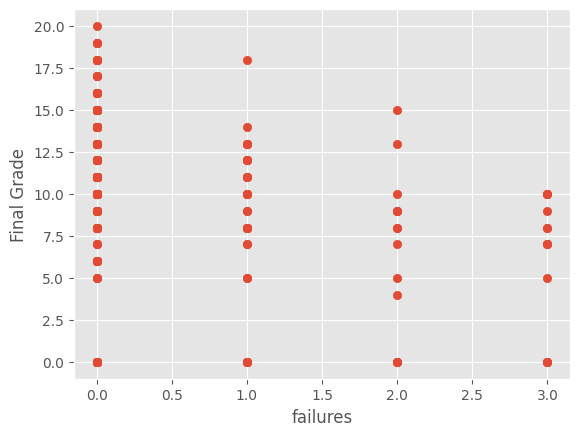

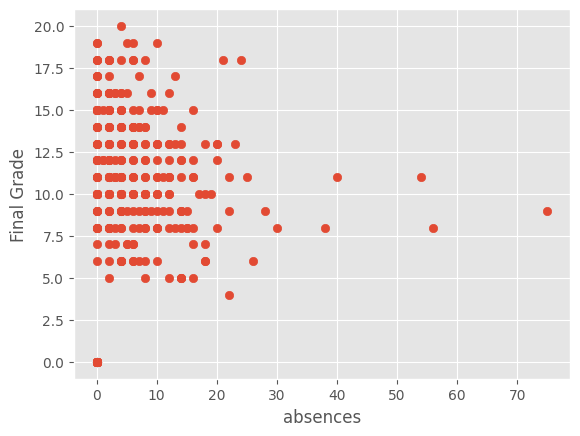

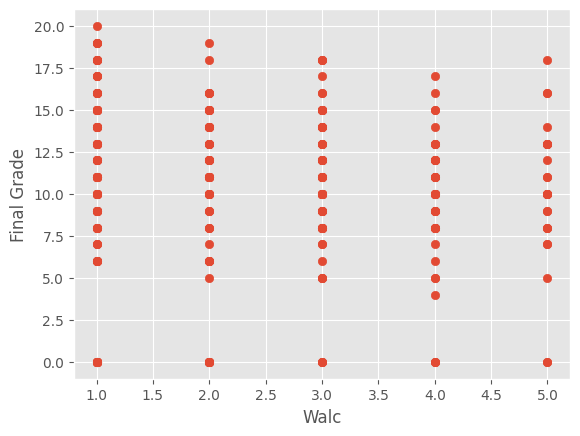

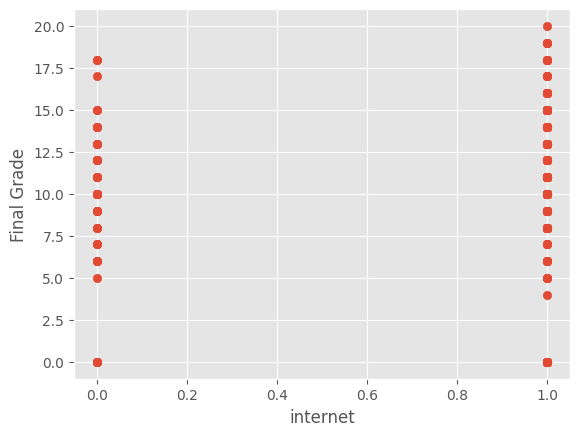

In [ ]:
colss = cols
colss.remove("G3")
for a in colss:
  p = a
  style.use("ggplot")
  pyplot.scatter(df[p], df[predict])
  pyplot.xlabel(p)
  pyplot.ylabel("Final Grade")
  pyplot.show()